In [252]:
import pandas as pd
songs = pd.read_csv(r'C:\Users\Peter Morris\repos\g10-202207\Module 9\Data\ml-03-data-processing-songs-dataset.csv')
pd.DataFrame.describe(songs)

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1987.000000,1985.000000,1986.000000,970.000000,1987.000000,1986.000000,960.000000,1986.000000,1990.000000,1987.000000
mean,997.500000,1959.526422,120.230730,59.664149,52.983505,-9.009562,19.013092,50.820833,28.897281,4.989950,59.518873
std,575.762538,250.650856,28.625839,22.159565,15.426169,3.652092,16.739697,24.955125,29.020822,4.402899,14.362661
min,1.000000,92.000000,15.000000,3.000000,10.000000,-27.000000,2.000000,5.000000,0.000000,2.000000,11.000000
25%,499.250000,1978.000000,99.000000,42.000000,42.000000,-11.000000,9.000000,30.000000,3.000000,3.000000,49.000000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,49.000000,18.000000,4.000000,62.000000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,71.000000,50.000000,5.000000,71.000000
max,1994.000000,2019.000000,305.000000,100.000000,96.000000,-2.000000,99.000000,98.000000,99.000000,55.000000,100.000000


In [ ]:
songs.info()
# length is a string
# month is a string
# we need to typecast them

In [188]:
songs.head()

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004.0,10,157.0,30.0,53.0,-14.0,11.0,68.0,201.0,94.0,3.0,71.0
1,2,Black Night,Deep Purple,album rock,2000.0,3,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,39.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6,168.0,69.0,66.0,-9.0,7.0,52.0,341.0,2.0,17.0,69.0
3,4,The Pretender,Foo Fighters,alternative metal,2007.0,1,173.0,96.0,43.0,-4.0,3.0,37.0,269.0,0.0,4.0,76.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8,106.0,82.0,58.0,-5.0,10.0,87.0,256.0,1.0,3.0,59.0


In [185]:
songs = songs.drop_duplicates()

In [ ]:
# songs = songs.drop(songs[songs.Year < 1800].index)

In [ ]:
len(songs)

In [253]:
# 92 -> 1992
songs['Year'].mask(songs['Year'] == 92.0, 1992, inplace=True)

In [ ]:
songs.describe()

In [ ]:
songs.info()

In [ ]:
len(songs)

In [ ]:
import pandas as pd
import os

In [ ]:
songs.Month.str.isnumeric().value_counts()

array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Beats Per Minute (BPM)'}>],
       [<AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Loudness (dB)'}>],
       [<AxesSubplot:title={'center':'Liveness'}>,
        <AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Acousticness'}>],
       [<AxesSubplot:title={'center':'Speechiness'}>,
        <AxesSubplot:title={'center':'Popularity'}>, <AxesSubplot:>]],
      dtype=object)

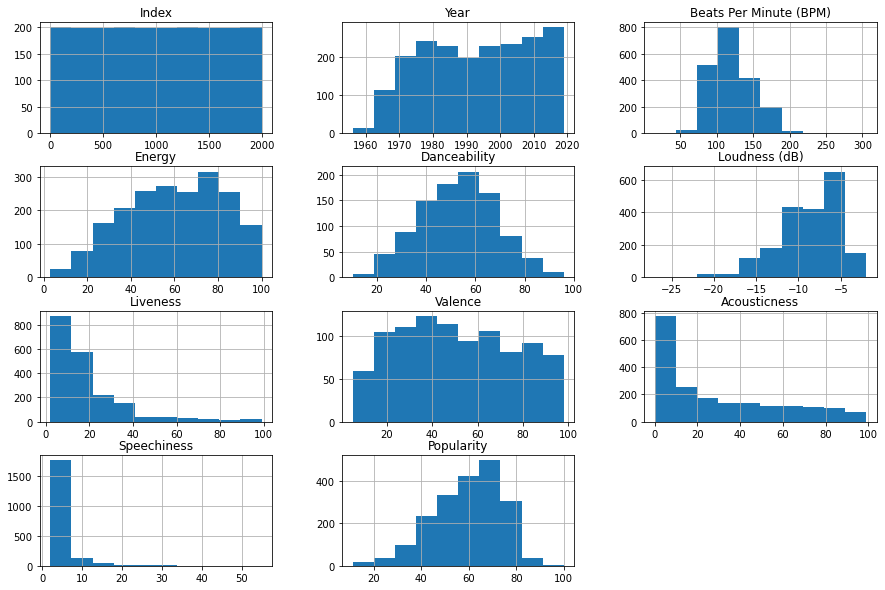

In [60]:
import seaborn as sns
songs.hist(figsize=(15,10))

In [257]:
songs['Length (Duration)'] = songs['Length (Duration)'].str.replace(',','').astype(float) # convert length string to float

In [ ]:
songs['Length (Duration)'].max()

In [ ]:
from datetime import datetime
songs['Month'] = songs['Month'].map(lambda x: datetime.strptime(x,'%b').strftime('%m') if x.isnumeric()==False else x)
# %b is the three letter month code

In [260]:
songs['Month'] = songs['Month'].astype(int)

In [ ]:
# did not work
songs['Month'].loc[pd.to_numeric(songs['Month'], errors='coerce').isna()]

In [ ]:
# did not work
d = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6,
     'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12
}
for i in range(len(songs)):
     if songs['Month'][i].isnumeric() == False:
          songs.Month = songs.Month.map(d)

In [ ]:
songs.head()

In [ ]:
songs['Month'][1]

In [261]:
# remove rows with > 50% null
songs.dropna(axis=0, how='any', thresh=0.5, subset=None, inplace=True)

In [262]:
# drop columns with > 50% null
limitPer = len(songs) * .5
songs = songs.dropna(thresh=limitPer, axis=1)
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   int32  
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Loudness (dB)           1987 non-null   float64
 9   Liveness                1986 non-null   float64
 10  Length (Duration)       1985 non-null   float64
 11  Acousticness            1986 non-null   float64
 12  Speechiness             1990 non-null   float64
 13  Popularity              1987 non-null   float64
dtypes: float64(9), int32(1), int64(1), objec

In [ ]:
songs_desc = songs.describe()
songs_desc

In [194]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   int32  
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Loudness (dB)           1987 non-null   float64
 9   Liveness                1986 non-null   float64
 10  Length (Duration)       1985 non-null   float64
 11  Acousticness            1986 non-null   float64
 12  Speechiness             1990 non-null   float64
 13  Popularity              1987 non-null   float64
dtypes: float64(9), int32(1), int64(1), objec

In [264]:
list(songs.columns[4:])

['Year',
 'Month',
 'Beats Per Minute (BPM)',
 'Energy',
 'Loudness (dB)',
 'Liveness',
 'Length (Duration)',
 'Acousticness',
 'Speechiness',
 'Popularity']

In [ ]:
# do not use
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()
            
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

songs = remove_outliers(songs,list(songs.columns[4:]),3)
songs

In [265]:
outlier_columns = set()
for col in list(songs.columns[4:]):
    mean = songs[col].mean()
    sd = songs[col].std()
    for i in range(len(songs)):
        if (songs[col][i] > mean+(3*sd)):
            outlier_columns.add(col)
outlier_columns

{'Beats Per Minute (BPM)', 'Length (Duration)', 'Liveness', 'Speechiness'}

In [266]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
songs.iloc[:,4:] # select columns 4 onward, which are all numeric
imp.fit(songs.iloc[:,4:])
songs.iloc[:,4:] = imp.transform(songs.iloc[:,4:])

In [267]:
songs[songs['Year'].isnull()].index.tolist() # it worked!

[]

In [200]:
songs['Year'][553]

1992.9939607448414

In [268]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(songs.iloc[:,:4])
songs.iloc[:,:4] = imp_cat.transform(songs.iloc[:,:4])

In [269]:
songs.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Month                     0
Beats Per Minute (BPM)    0
Energy                    0
Loudness (dB)             0
Liveness                  0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [136]:
songs.head()

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004.0,10.0,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0
1,2,Black Night,Deep Purple,album rock,2000.0,3.0,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6.0,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0
3,4,The Pretender,Foo Fighters,alternative metal,2007.0,1.0,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8.0,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0


In [270]:
songs['Year'] = songs['Year'].astype(int)
songs['Month'] = songs['Month'].astype(int) # get data in proper format in the parameters below
songs['Date'] = pd.to_datetime(songs['Year'].astype(str) + songs['Month'].astype(str), format='%Y%m')

In [204]:
songs

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,Date
0,1,Sunrise,Norah Jones,adult standards,2004,10,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,2004-10-01
1,2,Black Night,Deep Purple,album rock,2000,3,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,2000-03-01
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,6,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,2001-06-01
3,4,The Pretender,Foo Fighters,alternative metal,2007,1,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,2007-01-01
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,8,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,2002-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,4,94.0,21.0,-12.0,11.0,128.0,84.0,7.0,63.0,1958-04-01
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,6,175.0,76.0,-8.0,76.0,136.0,73.0,6.0,69.0,1958-06-01
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,4,168.0,80.0,-9.0,31.0,162.0,74.0,7.0,74.0,1959-04-01
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,10,174.0,26.0,-13.0,7.0,324.0,54.0,4.0,65.0,1959-10-01


In [271]:
from datetime import datetime
today = datetime.today()
# convert date to age
songs['Age'] = songs['Date'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )

In [161]:
songs.head()

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,Date,Age
0,1,Sunrise,Norah Jones,adult standards,2004,10,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,2004-10-01,17
1,2,Black Night,Deep Purple,album rock,2000,3,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,2000-03-01,22
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,6,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,2001-06-01,21
3,4,The Pretender,Foo Fighters,alternative metal,2007,1,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,2007-01-01,15
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,8,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,2002-08-01,20


In [272]:
songs.drop(['Year', 'Month', 'Date'], axis=1, inplace=True)

In [273]:
songs

,Index,Title,Artist,Top Genre,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,Age
0,1,Sunrise,Norah Jones,adult standards,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,17
1,2,Black Night,Deep Purple,album rock,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,22
2,3,Clint Eastwood,Gorillaz,alternative hip hop,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,21
3,4,The Pretender,Foo Fighters,alternative metal,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,15
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,94.0,21.0,-12.0,11.0,128.0,84.0,7.0,63.0,64
1990,1991,Hound Dog,Elvis Presley,adult standards,175.0,76.0,-8.0,76.0,136.0,73.0,6.0,69.0,64
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,168.0,80.0,-9.0,31.0,162.0,74.0,7.0,74.0,63
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,174.0,26.0,-13.0,7.0,324.0,54.0,4.0,65.0,62


In [274]:
print(len(set(songs['Title'])))
print(len(set(songs['Artist'])))
print(len(set(songs['Top Genre'])))

1955
729
149


In [307]:
songs_dummies = pd.get_dummies(songs,columns=['Title','Artist','Top Genre'])
songs_dummies

,Index,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,Age,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
0,1,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,17,...,0,0,0,0,0,0,0,0,0,0
1,2,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,22,...,0,0,0,0,0,0,0,0,0,0
2,3,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,21,...,0,0,0,0,0,0,0,0,0,0
3,4,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,15,...,0,0,0,0,0,0,0,0,0,0
4,5,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,94.0,21.0,-12.0,11.0,128.0,84.0,7.0,63.0,64,...,0,0,0,0,0,0,0,0,0,0
1990,1991,175.0,76.0,-8.0,76.0,136.0,73.0,6.0,69.0,64,...,0,0,0,0,0,0,0,0,0,0
1991,1992,168.0,80.0,-9.0,31.0,162.0,74.0,7.0,74.0,63,...,0,0,0,0,0,0,0,0,0,0
1992,1993,174.0,26.0,-13.0,7.0,324.0,54.0,4.0,65.0,62,...,0,0,0,0,0,0,0,0,0,0


In [299]:
songs_dummies.iloc[:,10].to_frame() # start of titles

,Title_(Don't Fear) The Reaper
0,0
1,0
2,0
3,0
4,0
...,...
1989,0
1990,0
1991,0
1992,0


In [300]:
songs_dummies.iloc[:,1965].to_frame() # start of artists

,Artist_10cc
0,0
1,0
2,0
3,0
4,0
...,...
1989,0
1990,0
1991,0
1992,0


In [301]:
songs_dummies.iloc[:,2694].to_frame() # start of genres

,Top Genre_acid jazz
0,0
1,0
2,0
3,0
4,0
...,...
1989,0
1990,0
1991,0
1992,0


In [308]:
# get 3*(k-1) features
songs_dummies.drop(["Title_(Don't Fear) The Reaper", "Artist_10cc", "Top Genre_acid jazz"], axis=1, inplace=True)

In [310]:
song = songs_dummies

In [312]:
# everything but the target variable, i.e., liveness
x = song.drop(["Liveness"], axis=1)

In [315]:
# the target variable
y = song["Liveness"].to_frame()
y

,Liveness
0,11.0
1,17.0
2,7.0
3,3.0
4,10.0
...,...
1989,11.0
1990,76.0
1991,31.0
1992,7.0


In [316]:
import numpy as np
from sklearn.model_selection import train_test_split

In [317]:
# test set is 30% of original data set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [321]:
X_train.describe()

,Index,Beats Per Minute (BPM),Energy,Loudness (dB),Length (Duration),Acousticness,Speechiness,Popularity,Age,Title_(Everything I Do) I Do It For You,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.0,...,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.0,1395.000000,1395.000000,1395.000000,1395.0
mean,997.885305,119.530355,59.697716,-9.007933,262.837205,29.009447,5.092452,59.519450,29.039427,0.0,...,0.005735,0.002867,0.000717,0.000717,0.000717,0.0,0.000717,0.000717,0.000717,0.0
std,577.408696,28.259275,22.122919,3.647183,98.363358,29.292102,4.640218,14.191316,16.239837,0.0,...,0.075538,0.053490,0.026774,0.026774,0.026774,0.0,0.026774,0.026774,0.026774,0.0
min,1.000000,15.000000,3.000000,-27.000000,93.000000,0.000000,2.000000,12.000000,2.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,507.500000,99.000000,42.000000,-11.000000,211.000000,3.000000,3.000000,49.000000,15.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,997.000000,119.000000,61.000000,-9.000000,245.000000,18.000000,4.000000,62.000000,29.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,1498.000000,135.000000,77.000000,-6.000000,289.500000,50.000000,5.000000,71.000000,43.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,1994.000000,305.000000,100.000000,-2.000000,1412.000000,98.000000,55.000000,100.000000,66.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [319]:
X_test.describe()

,Index,Beats Per Minute (BPM),Energy,Loudness (dB),Length (Duration),Acousticness,Speechiness,Popularity,Age,Title_(Everything I Do) I Do It For You,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,...,599.0,599.0,599.0,599.000000,599.0,599.000000,599.0,599.0,599.0,599.000000
mean,996.602671,121.861821,59.585977,-9.013356,262.089503,28.636060,4.751235,59.517529,28.120200,0.001669,...,0.0,0.0,0.0,0.001669,0.0,0.001669,0.0,0.0,0.0,0.001669
std,572.390217,29.210878,22.114982,3.645195,81.270169,28.202406,3.768806,14.684051,15.721731,0.040859,...,0.0,0.0,0.0,0.040859,0.0,0.040859,0.0,0.0,0.0,0.040859
min,3.000000,37.000000,5.000000,-22.000000,127.000000,0.000000,2.000000,11.000000,2.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
25%,482.500000,100.000000,42.500000,-11.000000,216.000000,4.000000,3.000000,50.000000,14.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
50%,999.000000,121.000000,60.000000,-8.000000,247.000000,18.000000,4.000000,61.000000,28.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
75%,1488.500000,139.000000,79.000000,-6.000000,289.000000,50.000000,5.000000,70.000000,40.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
max,1993.000000,198.000000,99.000000,-2.000000,1121.000000,99.000000,39.000000,98.000000,64.000000,1.000000,...,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000


In [322]:
y_train.describe()

,Liveness
count,1395.000000
mean,19.218704
std,17.013124
min,2.000000
25%,9.000000
50%,13.000000
75%,23.000000
max,99.000000


In [323]:
y_test.describe()

,Liveness
count,599.000000
mean,18.534246
std,15.971707
min,3.000000
25%,9.000000
50%,12.000000
75%,22.000000
max,99.000000
